In [14]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

def simulate_market_data(days, seed=42):
    np.random.seed(seed)  # 设置随机种子
    opens = []
    closes = []
    highs = []
    lows = []
    price = 100
    for _ in range(days):
        today_open = price + np.random.uniform(-1.5, 1.5)
        today_close = today_open + np.random.uniform(-1.5, 1.5)
        price = today_close
        today_high = max(today_open, today_close) + np.random.uniform(0, 2)
        today_low = min(today_open, today_close) - np.random.uniform(0, 2)
        opens.append(today_open)
        highs.append(today_high)
        lows.append(today_low)
        closes.append(today_close)
        
    df = pd.DataFrame({
        'Open': opens,
        'High': highs,
        'Low': lows,
        'Close': closes
    }, index=pd.date_range(start='2020-01-01', periods=days))
    return df

def detect_wedges(df, window=20, threshold=0.05):
    """
    检测楔形图案。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 候选楔形图案的宽度，基于bar计数
    threshold : 边界线回归斜率的差异阈值
    """
    wedges = []
    for i in range(window, len(df)):
        high = df['High'][i-window:i]
        low = df['Low'][i-window:i]
        
        high_slope, high_intercept, _, _, _ = linregress(range(window), high)
        low_slope, low_intercept, _, _, _ = linregress(range(window), low)
        
        # 判断两条线的收敛性
        if abs(high_slope-low_slope) < threshold:
            middle_price = (high_intercept + low_intercept) / 2
            wedges.append({'start': i-window, 'end': i, 'mid_price': middle_price})
    
    return wedges

def detect_breakouts(df, window=20):
    """
    检测突破模式。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 突破检测窗口大小，基于bar计数
    """
    breakouts = []
    for i in range(window, len(df)):
        recent_range = df[i-window:i]
        if df['High'][i] > recent_range['High'].max():
            # 向上突破
            breakouts.append({'date': df.index[i], 'price': df['High'][i], 'type': 'up'})
        elif df['Low'][i] < recent_range['Low'].min():
            # 向下突破
            breakouts.append({'date': df.index[i], 'price': df['Low'][i], 'type': 'down'})
    
    return breakouts


# 可视化函数，用于展示检测到的图案
def plot_detected_patterns(df, wedges, breakouts):
    plt.figure(figsize=(15, 7))
    plt.title("Detected Patterns")
    plt.plot(df.index, df['High'], label='High')
    plt.plot(df.index, df['Low'], label='Low')
    
    for wedge in wedges:
        plt.axvspan(df.index[wedge['start']], df.index[wedge['end']], color='orange', alpha=0.3)
    
    for breakout in breakouts:
        color = 'green' if breakout['type'] == 'up' else 'red'
        plt.axvline(x=breakout['date'], color=color, linestyle='--')
    
    plt.legend()
    plt.show()

/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/3836626404.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['High'][i] > recent_range['High'].max():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/3836626404.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Low'][i] < recent_range['Low'].min():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/3836626404.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

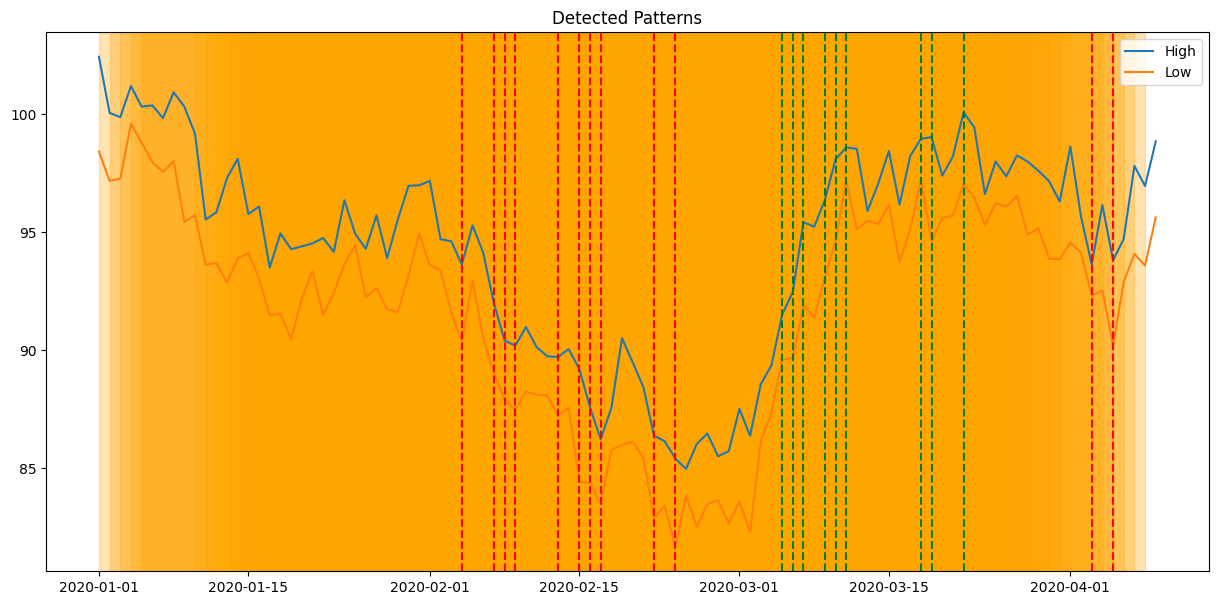

In [15]:
# 模拟数据
days = 100  # 假设需要100天的数据
market_data = simulate_market_data(days)

# 检测楔形和突破
wedges = detect_wedges(market_data)
breakouts = detect_breakouts(market_data)

# 可视化
plot_detected_patterns(market_data, wedges, breakouts)

In [46]:


def simulate_market_data(days, seed=42):
    np.random.seed(seed)  # 设置随机种子
    opens = []
    closes = []
    highs = []
    lows = []
    price = 100
    for _ in range(days):
        today_open = price + np.random.uniform(-1.5, 1.5)
        today_close = today_open + np.random.uniform(-1.5, 1.5)
        price = today_close
        today_high = max(today_open, today_close) + np.random.uniform(0, 2)
        today_low = min(today_open, today_close) - np.random.uniform(0, 2)
        opens.append(today_open)
        highs.append(today_high)
        lows.append(today_low)
        closes.append(today_close)
        
    df = pd.DataFrame({
        'Open': opens,
        'High': highs,
        'Low': lows,
        'Close': closes
    }, index=pd.date_range(start='2020-01-01', periods=days))
    return df


import numpy as np
import pandas as pd
from scipy.stats import linregress
import mplfinance as mpf
import matplotlib.dates as mdates  # 导入matplotlib的dates模块



def detect_wedges(df, window=20, threshold=0.05):
    """
    检测楔形图案。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 候选楔形图案的宽度，基于bar计数
    threshold : 边界线回归斜率的差异阈值
    """
    wedges = []
    for i in range(window, len(df)):
        high = df['High'][i-window:i]
        low = df['Low'][i-window:i]
        
        high_slope, high_intercept, _, _, _ = linregress(range(window), high)
        low_slope, low_intercept, _, _, _ = linregress(range(window), low)
        
        # 判断两条线的收敛性
        if abs(high_slope-low_slope) < threshold:
            middle_price = (high_intercept + low_intercept) / 2
            wedges.append({'start': i-window, 'end': i, 'mid_price': middle_price})
    
    return wedges

def detect_breakouts(df, window=20):
    """
    检测突破模式。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 突破检测窗口大小，基于bar计数
    """
    breakouts = []
    for i in range(window, len(df)):
        recent_range = df[i-window:i]
        if df['High'][i] > recent_range['High'].max():
            # 向上突破
            breakouts.append({'date': df.index[i], 'price': df['High'][i], 'type': 'up'})
        elif df['Low'][i] < recent_range['Low'].min():
            # 向下突破
            breakouts.append({'date': df.index[i], 'price': df['Low'][i], 'type': 'down'})
    
    return breakouts

def plot_with_mplfinance(df, wedges, breakouts, window=20):
    apds = []

    for wedge in wedges:
        start_index = wedge['start']
        end_index = wedge['end']

        # 使用提供的索引来计算高点和低点线性回归
        high_values = df['High'][start_index:end_index]
        low_values = df['Low'][start_index:end_index]
        high_dates = np.arange(start_index, end_index)
        low_dates = np.arange(start_index, end_index)

        high_slope, high_intercept, _, _, _ = linregress(high_dates, high_values)
        low_slope, low_intercept, _, _, _ = linregress(low_dates, low_values)
        
        # 生成高点和低点的趋势线，使其在非楔形部分为NaN
        high_line = pd.Series(index=df.index, data=np.nan)
        low_line = pd.Series(index=df.index, data=np.nan)
        high_line.iloc[start_index:end_index] = high_slope * (high_dates - start_index) + high_intercept
        low_line.iloc[start_index:end_index] = low_slope * (low_dates - start_index) + low_intercept

        apds.append(mpf.make_addplot(high_line, type='line', color='orange'))
        apds.append(mpf.make_addplot(low_line, type='line', color='orange'))


     # 添加突破点标记
    if breakouts:  # 如果有突破点
        breakout_df = pd.DataFrame(breakouts)
        breakout_dates = breakout_df['date'].apply(mdates.date2num).values  # 把日期转换成matplotlib格式
        breakout_prices = breakout_df['price'].values  # 获取价格值
        type_colors = {'up': 'green', 'down': 'red'}

        # 对每种类型的突破（向上和向下）分别处理
        for breakout_type in type_colors:
            # 筛选出对应类型的突破点
            mask = breakout_df['type'] == breakout_type
            dates = breakout_dates[mask]
            prices = breakout_prices[mask]
            marker = '^' if breakout_type == 'up' else 'v'  # 向上突破使用三角形标记，向下突破使用倒三角形标记
            color = type_colors[breakout_type]
            
            if len(dates) > 0:  # 如果有突破点
                apds.append(mpf.make_addplot(prices, type='scatter', markersize=200, marker=marker, color=color, panel=0, secondary_y=False, xAxis=dates))

    # 绘制K线图和附加图案
    mpf.plot(df, type='candle', style='yahoo', addplot=apds, title='Detected Patterns on K-line', volume=False)

# 主程序
days = 100
market_data = simulate_market_data(days)

# 检测楔形和突破
wedges = detect_wedges(market_data, window=20, threshold=0.05)
breakouts = detect_breakouts(market_data, window=20)

# 使用mplfinance绘图
plot_with_mplfinance(market_data, wedges, breakouts, window=20)

/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/2344411527.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['High'][i] > recent_range['High'].max():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/2344411527.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Low'][i] < recent_range['Low'].min():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/2344411527.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

KeyError: 'Unrecognized kwarg="xAxis"'

In [62]:

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates
import matplotlib.pyplot as plt 

import numpy as np
import os
import pandas as pd
from scipy.stats import linregress

# plt.style.use('seaborn-darkgrid')

def pivot_id(ohlc, l, n1, n2):
    """
    Get the pivot id 

    :params ohlc is a dataframe
    :params l is the l'th row
    :params n1 is the number of candles to the left
    :params n2 is the number of candles to the right
    :return int  
    """

    # Check if the length conditions met
    if l-n1 < 0 or l+n2 >= len(ohlc):
        return 0
    
    pivot_low  = 1
    pivot_high = 1

    for i in range(l-n1, l+n2+1):
        if(ohlc.loc[l,"Close"] > ohlc.loc[i, "Close"]):
            pivot_low = 0

        if(ohlc.loc[l, "Close"] < ohlc.loc[i, "Close"]):
            pivot_high = 0

    if pivot_low and pivot_high:
        return 3

    elif pivot_low:
        return 1

    elif pivot_high:
        return 2
    else:
        return 0


def pivot_point_position(row):
    """
    Get the Pivot Point position and assign a Close value

    :params row -> row of the ohlc dataframe
    :return float
    """
   
    if row['Pivot']==1:
        return row['Close']-1e-3
    elif row['Pivot']==2:
        return row['Close']+1e-3
    else:
        return np.nan


def find_wedge_points(ohlc, back_candles):
    """
    Find wedge points

    :params ohlc         -> dataframe that has OHLC data
    :params back_candles -> number of periods to lookback
    :return all_points
    """
    all_points = []
    for candle_idx in range(back_candles+10, len(ohlc)):

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(candle_idx-back_candles, candle_idx+1):
            if ohlc.loc[i,"Pivot"] == 1:
                minim = np.append(minim, ohlc.loc[i, "Close"])
                xxmin = np.append(xxmin, i) 
            if ohlc.loc[i,"Pivot"] == 2:
                maxim = np.append(maxim, ohlc.loc[i,"Close"])
                xxmax = np.append(xxmax, i)

        
        if (xxmax.size <3 and xxmin.size <3) or xxmax.size==0 or xxmin.size==0:
            continue

        slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
        slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)
        

        # Check if the lines are in the same direction
        if abs(rmax)>=0.9 and abs(rmin)>=0.9 and ((slmin>=1e-3 and slmax>=1e-3 ) or (slmin<=-1e-3 and slmax<=-1e-3)):
                # Check if lines are parallel but converge fast 
                x_ =   (intercmin -intercmax)/(slmax-slmin)
                cors = np.hstack([xxmax, xxmin])  
                if (x_ - max(cors))>0 and (x_ - max(cors))<(max(cors) - min(cors))*3 and slmin/slmax > 0.75 and slmin/slmax < 1.25:  
                     all_points.append(candle_idx)
            

    return all_points


def point_position_plot(ohlc, start_index, end_index):
        """
        Plot the pivot points over a sample period

        :params ohlc        -> dataframe that has OHLC data
        :params start_index -> index where to start taking the sample data
        :params end_index   -> index where to stop taking the sample data
        :return 
        """
        ohlc_subset = ohlc[start_index:end_index]
        ohlc_subset_copy = ohlc_subset.copy()
        ohlc_subset_copy.loc[:,"Index"] = ohlc_subset_copy.index 



        fig, ax = plt.subplots(figsize=(15,7))
        candlestick_ohlc(ax, ohlc_subset_copy.loc[:, ["Index","Open", "High", "Low", "Close"] ].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
        ax.scatter(ohlc_subset_copy["Index"], ohlc_subset_copy["PointPos"])

        ax.grid(True)
        ax.set_xlabel('Index')
        ax.set_ylabel('Price')

      
        fn   = f"wedge-pivot-point-sample.png"
        file = os.path.join( dir_, fn)
        plt.savefig(file, format="png")

        return

def save_plot(ohlc, all_points, back_candles):
    """
    Save all the wedge graphs

    :params ohlc         -> dataframe that has OHLC data
    :params all_points   -> wedge points
    :params back_candles -> number of periods to lookback
    :return 
    """

    total = len(all_points)
    for j, point in enumerate(all_points):

        maxim = np.array([])
        minim = np.array([])
        xxmin = np.array([])
        xxmax = np.array([])

        for i in range(point-back_candles, point+1):
            if ohlc.loc[i,"Pivot"] == 1:
                minim = np.append(minim, ohlc.loc[i, "Close"])
                xxmin = np.append(xxmin, i) 
            if ohlc.loc[i,"Pivot"] == 2:
                maxim = np.append(maxim, ohlc.loc[i,"Close"])
                xxmax = np.append(xxmax, i)
                

        slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
        slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)

        xxmin = np.append(xxmin, xxmin[-1]) 
        xxmax = np.append(xxmax, xxmax[-1])

        ohlc_subset = ohlc[point-back_candles-5:point+back_candles+5]
        ohlc_subset_copy = ohlc_subset.copy()
        ohlc_subset_copy.loc[:,"Index"] = ohlc_subset_copy.index
    
        xxmin = np.append(xxmin, xxmin[-1]+15)
        xxmax = np.append(xxmax, xxmax[-1]+15)

        fig, ax = plt.subplots(figsize=(15,7))

        
        candlestick_ohlc(ax, ohlc_subset_copy.loc[:, ["Index","Open", "High", "Low", "Close"] ].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
        ax.plot(xxmin, xxmin*slmin + intercmin)
        ax.plot(xxmax, xxmax*slmax + intercmax)

        ax.grid(True)
        ax.set_xlabel('Index')
        ax.set_ylabel('Price')

  
        fn = f"wedge-{point}.png"
        file = os.path.join( dir_,fn)
        plt.savefig(file, format="png")
        print(f"Completed {round((j+1)/total,2)*100}%")

    return


/Users/lingyu/anaconda3/envs/ds_env/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/lingyu/anaconda3/envs/ds_env/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/lingyu/anaconda3/envs/ds_env/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Completed 25.0%
Completed 50.0%
Completed 75.0%
Completed 100.0%


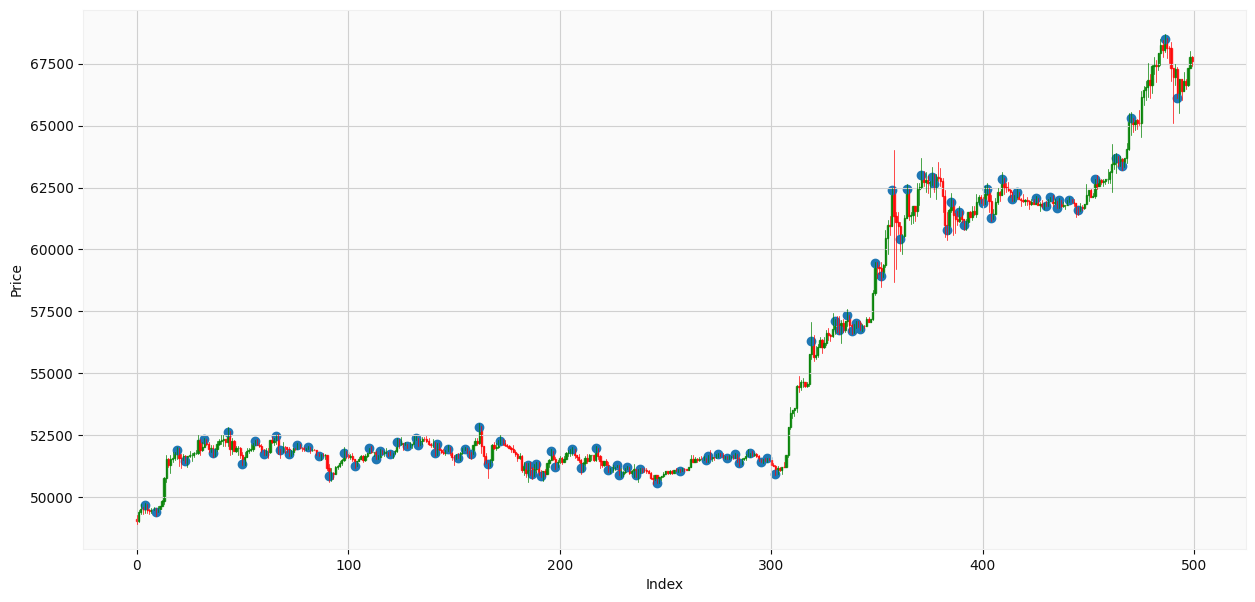

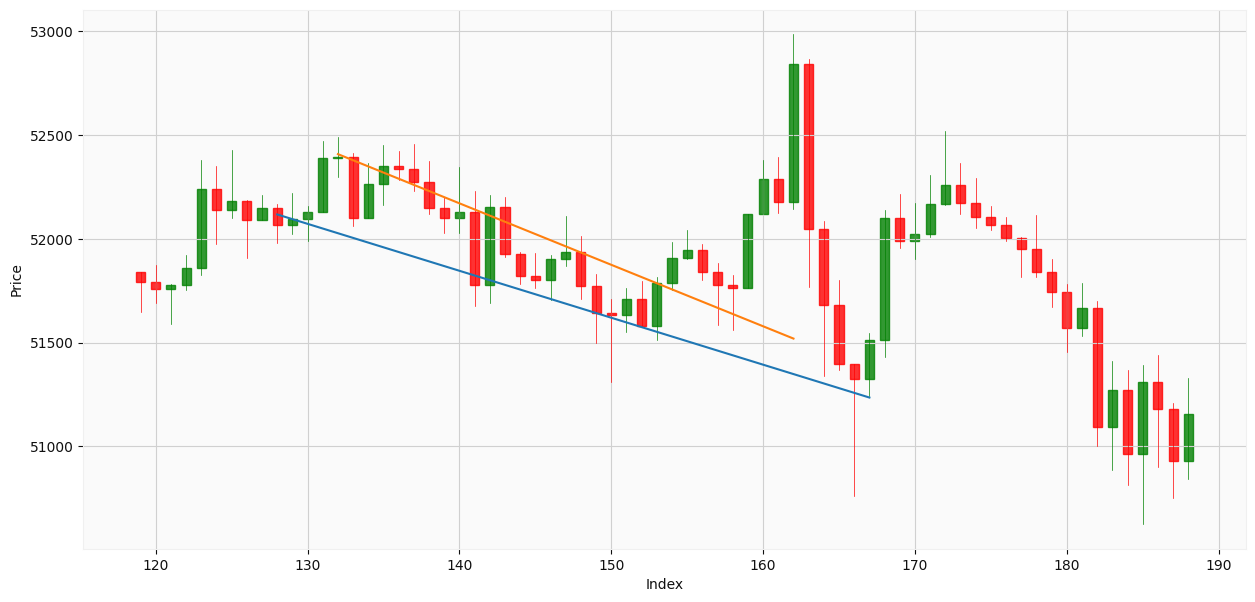

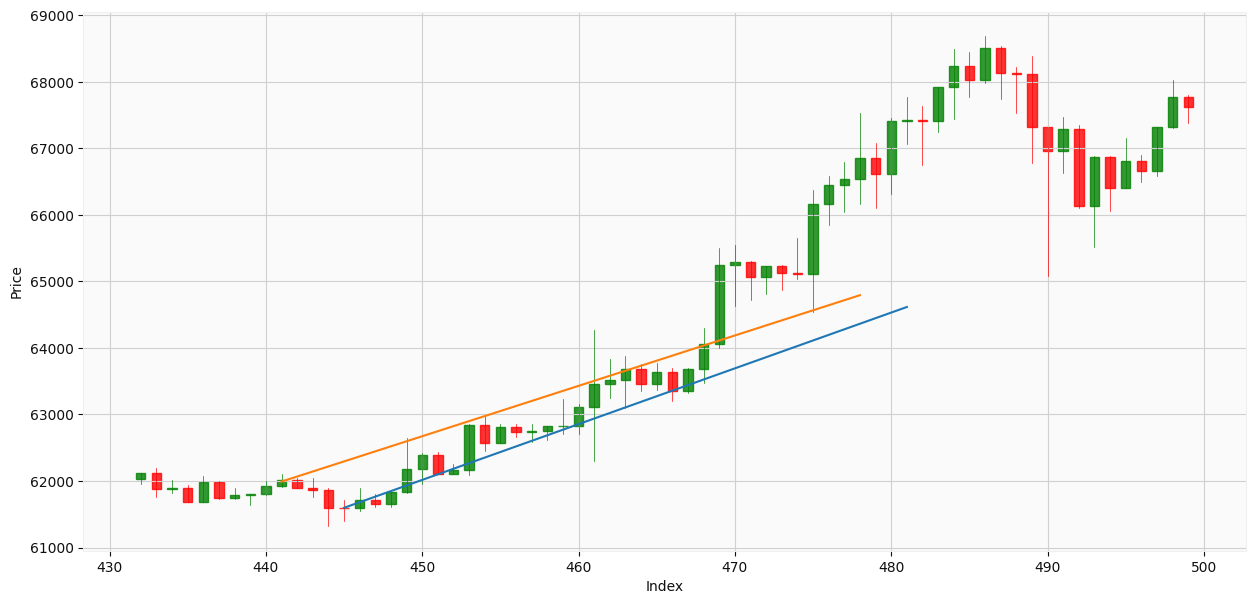

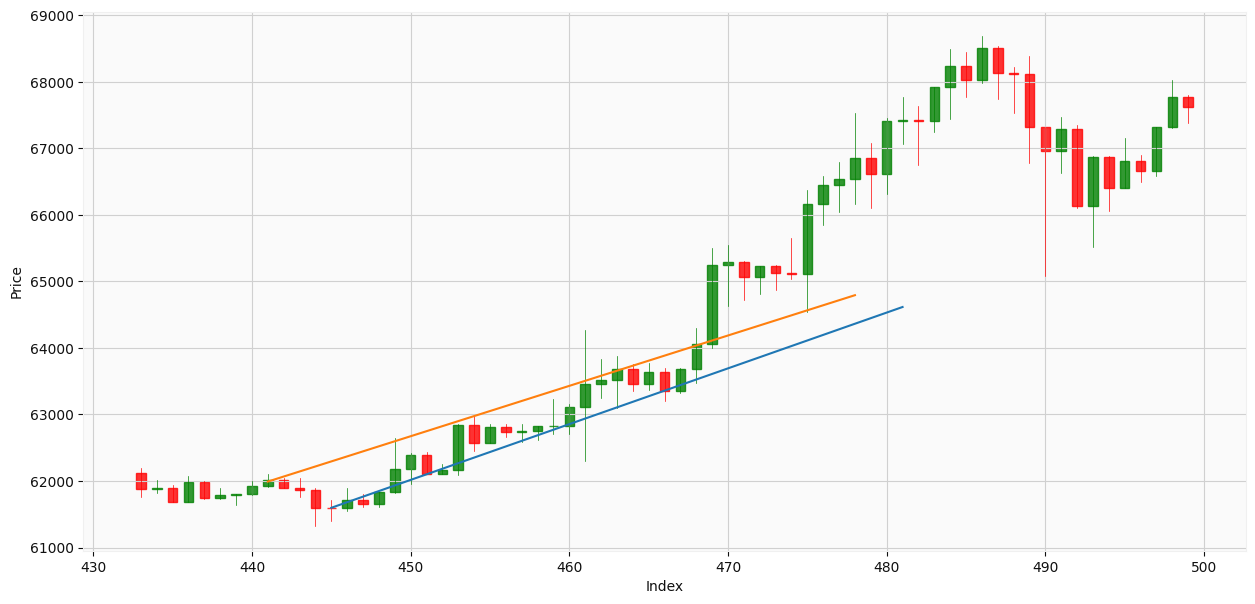

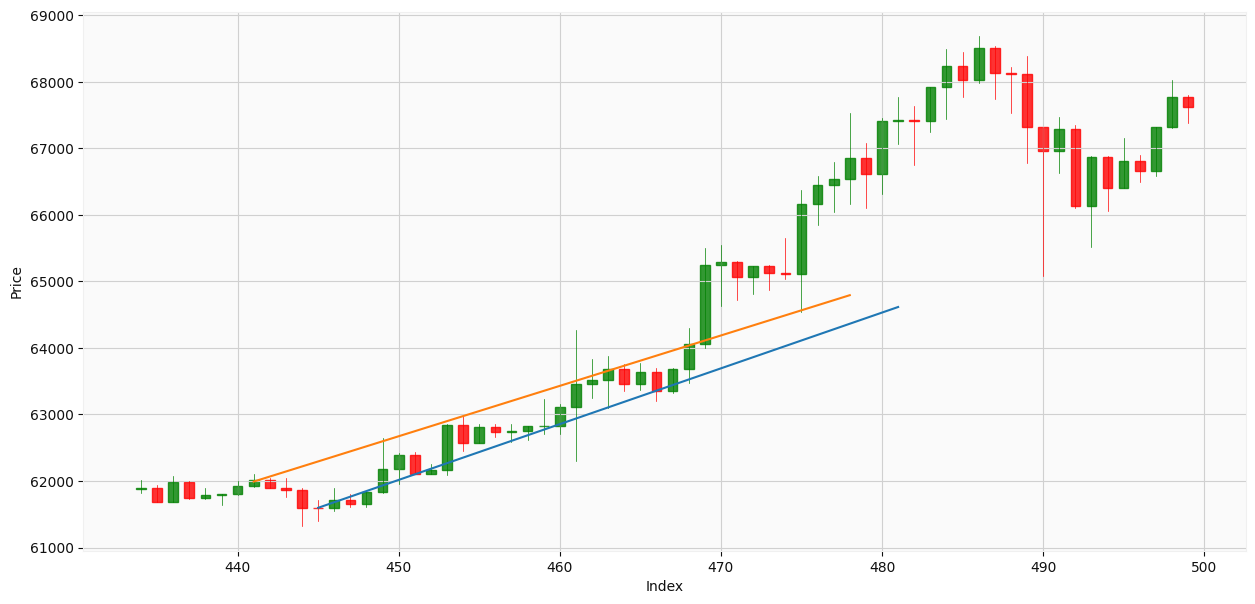

In [65]:
import ccxt

# Connect to Binance using a proxy
exchange = ccxt.binance({
    'rateLimit': 1200,
    'enableRateLimit': True,
    'proxies': {
        'http': 'http://127.0.0.1:7890',
        'https': 'http://127.0.0.1:7890',
    },
})

# Function to fetch historical data for a symbol
def fetch_data(symbol, timeframe='1h', since=None, limit=500):
    # Fetch the candlestick data from Binance
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since, limit)
    # Create a DataFrame from the fetched data
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
    # Convert timestamp to datetime for better readability
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    # Set the timestamp as the index
    # df.set_index('timestamp', inplace=True)
    return df

dir_ = './'
# dir_ = os.path.realpath('').split("research")[0]
# file = os.path.join( dir_,'data','eurusd-4h.csv') 
# df = pd.read_csv(file)

# # Remove all non-trading periods
# df=df[df['Volume']!=0]
# df.reset_index(drop=True, inplace=True)

df = fetch_data('BTC/USDT')

ohlc         = df.loc[:, ["Open", "High", "Low", "Close"] ]
# ohlc["Date"] = pd.to_datetime(ohlc["Date"])
ohlc['Date'] = ohlc.index
ohlc["Date"] = ohlc["Date"].map(mpdates.date2num)

ohlc["Pivot"] = 0

# Get the minimas and maximas 
ohlc["Pivot"]    = ohlc.apply(lambda x: pivot_id(ohlc, x.name, 3, 3), axis=1)
ohlc['PointPos'] = ohlc.apply(lambda x: pivot_point_position(x), axis=1) # Used for visualising the pivot points


# Plot sample point positions
point_position_plot(ohlc, 0, 500)

# # Find all wedge pattern points
back_candles = 30
all_points   = find_wedge_points(ohlc, back_candles)

# Plot the wedge pattern graphs
save_plot(ohlc, all_points, back_candles)


['MEW/USDT:USDT', 'ZK/USDT:USDT', 'IO/USDT:USDT', 'TURBO/USDT:USDT', 'NOT/USDT:USDT', 'BB/USDT:USDT', 'REZ/USDT:USDT', 'OMNI/USDT:USDT', 'TAO/USDT:USDT', 'SAGA/USDT:USDT', 'TNSR/USDT:USDT', 'W/USDT:USDT', 'ENA/USDT:USDT', 'ETHFI/USDT:USDT', 'BOME/USDT:USDT', 'VANRY/USDT:USDT', 'AEVO/USDT:USDT', 'METIS/USDT:USDT', 'MYRO/USDT:USDT', 'AXL/USDT:USDT']
MEW/USDT
ZK/USDT
IO/USDT
TURBO/USDT
NOT/USDT
BB/USDT
REZ/USDT
OMNI/USDT
TAO/USDT
SAGA/USDT
TNSR/USDT
W/USDT
ENA/USDT
ETHFI/USDT
BOME/USDT
VANRY/USDT
AEVO/USDT
METIS/USDT
MYRO/USDT
AXL/USDT
[-15.738, -10.93, -13.515, -16.174, -11.518, -18.636, -10.519, -16.029, -16.571, -11.084, -13.977, -12.136, -12.916, -10.908, -15.318, -8.89, -10.214]


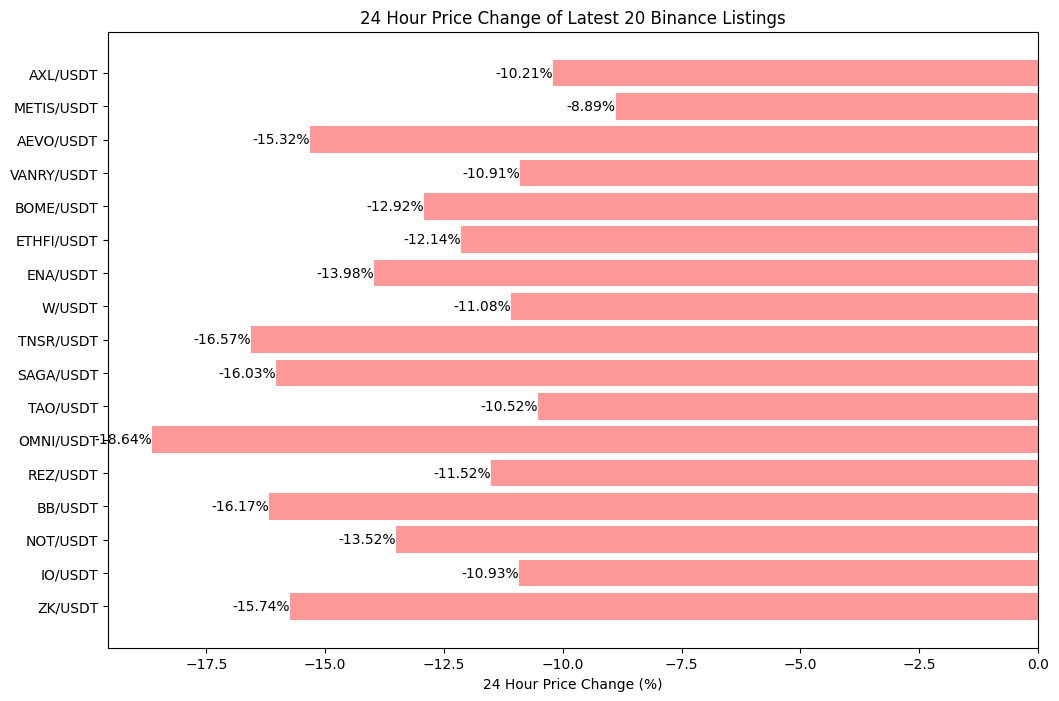

In [24]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# 初始化 binance 交易所
binance = ccxt.binance({
    'rateLimit': 1200,
    'enableRateLimit': True,
    'proxies': {
        'http': 'http://127.0.0.1:7890',
        'https': 'http://127.0.0.1:7890',
    },
})


# 获取最新上架的 n 个 USDT 交易对
def get_latest_symbols(n=20):
    markets = binance.load_markets()
    symbols_info = [(symbol, market['info']['onboardDate']) for symbol, market in markets.items() if 'onboardDate' in market['info'] and symbol.endswith('USDT')]
    
    # 按上架日期排序并选择最新的 n 个币种
    latest_symbols = sorted(symbols_info, key=lambda x: x[1], reverse=True)[:n]
    return [symbol for symbol, _ in latest_symbols]

# 获取最近24小时的涨跌幅
def get_24h_ticker(symbol):
    print(symbol)
    if symbol not in  ['MEW/USDT', 'TURBO/USDT', 'MYRO/USDT']:
        ticker = binance.public_get_ticker_24hr({'symbol': symbol.replace('/', '')})
        return float(ticker['priceChangePercent'])

# 画出涨跌幅的柱状图
def plot_symbols_performance(symbols, performance):
    plt.figure(figsize=(12, 8))
    
    # 绘制柱状图时，根据涨跌情况动态设置颜色
    for index, symbol in enumerate(symbols):
        # color = 'green' if performance[index] > 0 else 'red'
        bar_colors = ['#ff9999' if x < 0 else 'green' for x in performance]

        plt.barh(symbol, performance[index], color=bar_colors)
    
    plt.xlabel('24 Hour Price Change (%)')
    plt.title('24 Hour Price Change of Latest 20 Binance Listings')
    
    # 显示每个柱子的涨跌幅
    for index, value in enumerate(performance):
        plt.text(value, index, f'{value:.2f}%', va='center', ha='right' if value < 0 else 'left')
    
    plt.show()

# 主函数获取数据并绘图
def main():
    # 获取最新上架的20个币种
    latest_symbols = get_latest_symbols(20)
    print(latest_symbols)
    
    # 获取这些币种最近24小时的涨跌幅
    performance = [get_24h_ticker(symbol.replace(':USDT', '')) for symbol in latest_symbols]
    performance = [x for x in performance if x is not None]
    
    print(performance)

    # 画图展示
    latest_symbols = [x.replace(':USDT', '') for x in latest_symbols if x not in ['MEW/USDT:USDT', 'TURBO/USDT:USDT', 'MYRO/USDT:USDT']]
    plot_symbols_performance(latest_symbols, performance)

# 执行主函数
main()

[('MEW/USDT:USDT', '1718632800000'), ('ZK/USDT:USDT', '1718622000000'), ('IO/USDT:USDT', '1718114400000'), ('TURBO/USDT:USDT', '1717083000000'), ('NOT/USDT:USDT', '1715868000000'), ('BB/USDT:USDT', '1715603400000'), ('REZ/USDT:USDT', '1714485600000'), ('OMNI/USDT:USDT', '1713362400000'), ('TAO/USDT:USDT', '1712845800000'), ('SAGA/USDT:USDT', '1712658600000'), ('TNSR/USDT:USDT', '1712595600000'), ('W/USDT:USDT', '1712158200000'), ('ENA/USDT:USDT', '1712061000000'), ('ETHFI/USDT:USDT', '1710775800000'), ('BOME/USDT:USDT', '1710592200000'), ('VANRY/USDT:USDT', '1710351000000'), ('AEVO/USDT:USDT', '1710336600000'), ('METIS/USDT:USDT', '1710232200000'), ('MYRO/USDT:USDT', '1709627400000'), ('AXL/USDT:USDT', '1709307000000'), ('TON/USDT:USDT', '1709296200000'), ('PORTAL/USDT:USDT', '1709218800000'), ('GLM/USDT:USDT', '1708596000000'), ('MAVIA/USDT:USDT', '1708509600000'), ('STRK/USDT:USDT', '1708448400000'), ('PIXEL/USDT:USDT', '1708354800000'), ('OM/USDT:USDT', '1707832800000'), ('DYM/USDT:

/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_58039/2635428608.py:50: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  onboard_date = pd.to_datetime(onboard_date, unit='ms')


Could not fetch data for TURBO/USDT: binance {"code":-1121,"msg":"Invalid symbol."}
Could not fetch data for MYRO/USDT: binance {"code":-1121,"msg":"Invalid symbol."}
Could not fetch data for TON/USDT: binance {"code":-1121,"msg":"Invalid symbol."}
Could not fetch data for MAVIA/USDT: binance {"code":-1121,"msg":"Invalid symbol."}
Could not fetch data for ZETA/USDT: binance {"code":-1121,"msg":"Invalid symbol."}
Could not fetch data for ONDO/USDT: binance {"code":-1121,"msg":"Invalid symbol."}
Could not fetch data for 1000RATS/USDT: binance {"code":-1121,"msg":"Invalid symbol."}
Could not fetch data for ETHW/USDT: binance {"code":-1121,"msg":"Invalid symbol."}


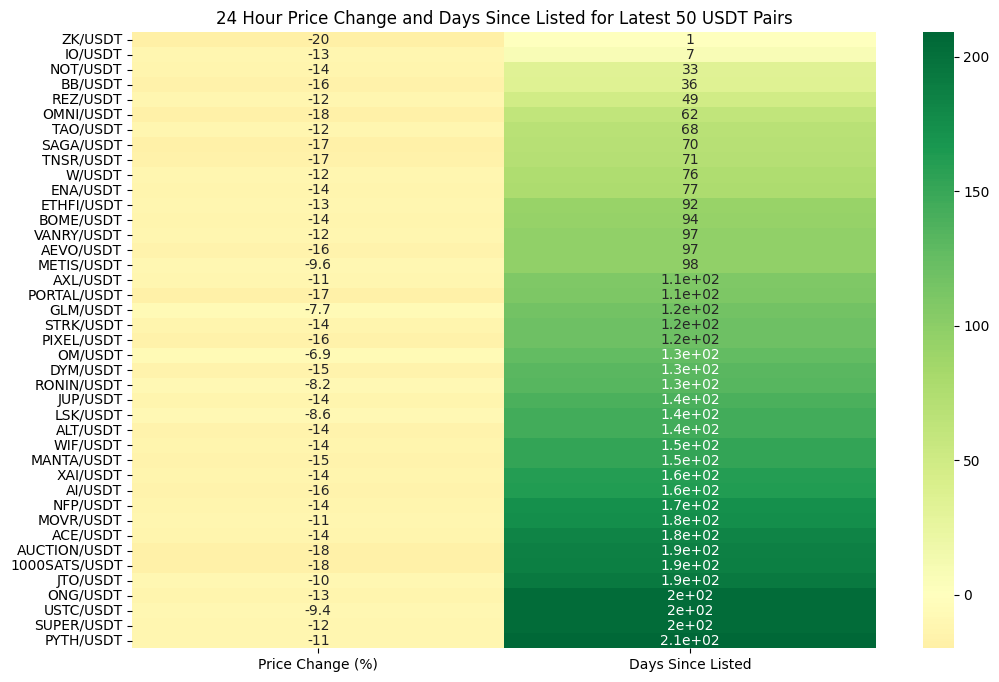

In [42]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

binance = ccxt.binance({
    'rateLimit': 1200,
    'enableRateLimit': True,
    'proxies': {
        'http': 'http://127.0.0.1:7890',
        'https': 'http://127.0.0.1:7890',
    },
})


# 获取最新上架的 n 个 USDT 交易对
def get_latest_symbols(n=50):
    markets = binance.load_markets()
    symbols_info = [
        (symbol, market['info']['onboardDate']) for symbol, market in markets.items() 
        if 'onboardDate' in market['info'] and symbol.endswith('USDT')
    ]
    
    # 按上架日期排序并选择最新的 n 个币种
    latest_symbols = sorted(symbols_info, key=lambda x: x[1], reverse=True)[:n]
    return latest_symbols


# # 获取最新上架的 n 个 USDT 交易对
# def get_latest_symbols(n=20):
#     markets = binance.load_markets()
#     symbols_info = [(symbol, market['info']['onboardDate']) for symbol, market in markets.items() if 'onboardDate' in market['info'] and symbol.endswith('USDT')]
    
#     # 按上架日期排序并选择最新的 n 个币种
#     latest_symbols = sorted(symbols_info, key=lambda x: x[1], reverse=True)[:n]
#     return [symbol for symbol, _ in latest_symbols]


# 获取最近24小时的涨跌幅
def get_24h_ticker(symbol):
    try:
        ticker = binance.public_get_ticker_24hr({'symbol': symbol.replace('/', '')})
        return float(ticker['priceChangePercent'])
    except Exception as e:
        print(f"Could not fetch data for {symbol}: {e}")
        return None

def get_days_since_listed(onboard_date):
    onboard_date = pd.to_datetime(onboard_date, unit='ms')
    days_since_listed = (pd.Timestamp.now() - onboard_date).days
    return days_since_listed

# 画出涨跌幅和上架天数的热力图
def plot_heatmap(df):
    plt.figure(figsize=(12, 8))
    
    sns.heatmap(df, annot=True, cmap='RdYlGn', center=0)
    plt.title('24 Hour Price Change and Days Since Listed for Latest 50 USDT Pairs')
    plt.show()

# 获取最新上架的50个USDT交易对
latest_symbols_info = get_latest_symbols(50)
print(latest_symbols_info)

latest_symbols = [symbol for symbol, _ in latest_symbols_info]

# 获取这些交易对最近24小时的涨跌幅及上架天数
performance = []
days_since_listed = []
valid_symbols = []

for symbol, onboard_date in latest_symbols_info:
    symbol = symbol.replace(':USDT', '')
    price_change = get_24h_ticker(symbol)
    if price_change is not None:
        valid_symbols.append(symbol)
        performance.append(price_change)
        days_since_listed.append(get_days_since_listed(onboard_date))


# 检查是否有足够的数据绘制热力图
if valid_symbols and performance and days_since_listed:
    data = {
        'Price Change (%)': performance,
        'Days Since Listed': days_since_listed
    }
    
    df = pd.DataFrame(data, index=valid_symbols)
    
    # 画图展示
    plot_heatmap(df)
else:
    print("Not enough data to plot the heatmap.")


In [34]:
latest_symbols_info

[]